# Logistic Regression Notebook

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [33]:
employee = pd.read_csv("../data/employee_cleaned.csv")

## Encoding Categories via panda dummy variables

In [34]:
employee = pd.get_dummies(employee, columns=["City","EverBenched","JoiningYear"])

In [35]:
employee = employee.drop(columns = ['Age','Education','PaymentTier','Gender','ExperienceInCurrentDomain'])

## Partition Data prior to training model

In [36]:
X = employee.loc[:, employee.columns != 'LeaveOrNot']
X = sm.add_constant(X)
y = employee.loc[:, employee.columns == 'LeaveOrNot']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

## Validating Partition

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

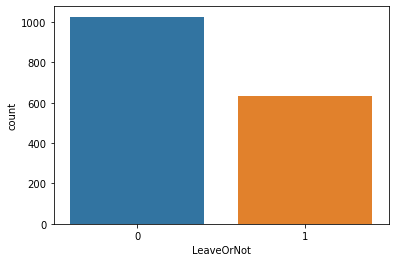

In [38]:
sns.countplot(x="LeaveOrNot", data = y_train)

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

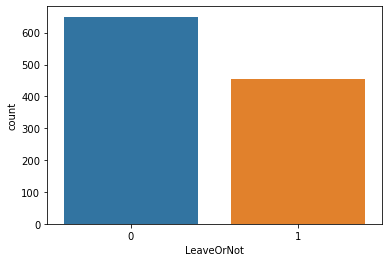

In [39]:
sns.countplot(x="LeaveOrNot", data = y_test)

## Executing Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logReg = LogisticRegression().fit(X_train, y_train.values.ravel())

## Predicting Values and Evaluating Metrics

In [42]:
y_pred = logReg.predict(X_test)

In [48]:
ypred = pd.crosstab(y_test['LeaveOrNot'], y_pred, rownames = ['Actual'], colnames = ['Predicted'])
ypred['Total'] = ypred.sum(axis=1); ypred.loc['Total'] = ypred.sum()
print(ypred)

Predicted    0    1  Total
Actual                    
0          606   44    650
1          288  168    456
Total      894  212   1106


In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6998191681735986
Precision: 0.7924528301886793
Recall: 0.3684210526315789


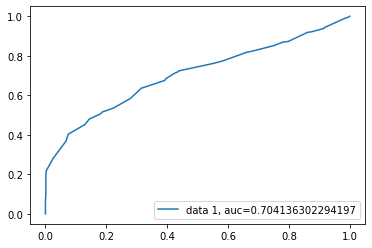

In [46]:
y_pred_proba = logReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [47]:
logreg_sm = sm.Logit(y_train, X_train).fit()
print(logreg_sm.summary2())

Optimization terminated successfully.
         Current function value: 0.572022
         Iterations 16
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.139     
Dependent Variable: LeaveOrNot       AIC:              1916.8250 
Date:               2022-04-02 00:29 BIC:              1970.9586 
No. Observations:   1658             Log-Likelihood:   -948.41   
Df Model:           9                LL-Null:          -1102.0   
Df Residuals:       1648             LLR p-value:      8.0506e-61
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     16.0000                                      
------------------------------------------------------------------
                      Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
------------------------------------------------------------------
const                -0.0804       nan  nan    nan     nan     nan
City_Bangalore       -0.2821       nan  nan    nan     nan   